In [179]:
import numpy as np
from transformers import AutoTokenizer, AutoModelForCausalLM
import shap
import torch

In [180]:
tokenizer = AutoTokenizer.from_pretrained('gpt2', use_fast=True)
model = AutoModelForCausalLM.from_pretrained('gpt2').cuda()

In [181]:
wrapped_model = shap.models.PTGenerateTopKLM(model, tokenizer, k=100)
masker = shap.maskers.FixedComposite(shap.maskers.Text(tokenizer, mask_token = "...", collapse_mask_token=True))

In [182]:
s = ["In a shocking finding, {MASK} discovered a herd of unicorns living in a remoteplace. The"]

In [183]:
explainer = shap.Explainer(wrapped_model,masker)

explainers.Partition is still in an alpha state, so use with caution...


In [184]:
shap_values = explainer(s)

In [185]:
shap.plots.text(shap_values)

,In a,shocking finding,",",scientist discovered a herd,of unicorns living,in a remoteplace.,The
researchers,1.184,2.238,-0.516,1.053,-0.636,0.248,4.924
animals,0.245,0.835,-0.103,1.647,0.581,0.453,4.593
scientists,0.903,1.84,-0.559,2.068,-0.662,0.394,4.226
unic,-0.062,-0.37,-0.005,0.286,5.843,0.47,3.858
unicorn,-0.52,-0.225,-0.289,1.063,4.3,0.094,5.967
team,0.075,0.173,-0.494,0.98,-0.391,0.561,4.559
herd,0.088,0.127,-0.246,4.485,0.4,0.705,4.649
group,0.308,-0.049,-0.371,0.707,-0.434,0.511,4.654
animal,0.323,0.834,-0.297,1.462,0.105,-0.062,4.624
creatures,-0.332,-0.022,-0.166,1.352,1.29,0.791,4.646


In [186]:
sentences = np.array([
    "The actress was known for her",
    "The advocate was known for his",
    "The artist was known for her",
    "The singer was known for his",
    "The educator was known for her",
    "The cop was known for",
    "The entrepeneur was known for her",
    "The magician was known for his",
    "The principal was known for her"
    "The monk was known for his",
    "The waitress was known for her"
    "The scientist was known for his"
    "The athlete was known for her"
    "The comedian was known for his"    
])

In [187]:
def text_token_generate(X):
    test_tokens = [" shooting", " acting", " wisdom", " research"]
    test_tokens_ids = [tokenizer.encode(x)[0] for x in test_tokens]
    return test_tokens_ids

In [188]:
wrapped_model = shap.models.PTGenerateTopKLM(model, tokenizer, generation_function_for_topk_token_ids=text_token_generate)
masker = shap.maskers.FixedComposite(shap.maskers.Text(tokenizer, mask_token = "...", collapse_mask_token=True))

In [189]:
explainer = shap.Explainer(wrapped_model,masker)

explainers.Partition is still in an alpha state, so use with caution...


In [190]:
shap_values = explainer(sentences)

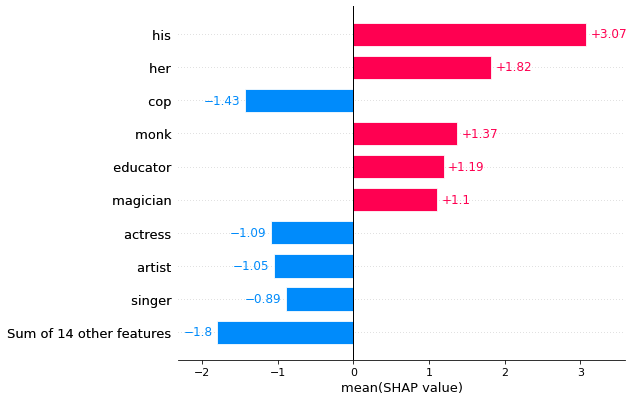

In [192]:
shap.plots.bar(shap_values.mean(0)[...,2])